In [50]:
# import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
# from sklearn.mixture import GMM

In [90]:
df = pd.read_csv("../dataset/DATA_FINAL.csv", low_memory = False)


In [91]:
df

,RESP,ABPmean,ABPsys,ABPdias,Tblood,SpO2,HR,PULSE,ALARM
0,15.0,89.0,114.0,78.0,37.1,100.0,101.0,100.0,False
1,15.0,89.0,114.0,78.0,37.1,100.0,101.0,101.0,False
2,15.0,89.0,113.0,78.0,37.1,100.0,101.0,101.0,False
3,15.0,89.0,113.0,78.0,37.1,100.0,101.0,101.0,False
4,15.0,89.0,114.0,78.0,37.1,100.0,101.0,101.0,False
...,...,...,...,...,...,...,...,...,...
131244,23.0,111.0,132.0,99.0,37.0,98.0,109.0,108.0,False
131245,23.0,111.0,132.0,100.0,37.0,98.0,109.0,108.0,False
131246,23.0,111.0,132.0,100.0,37.0,98.0,109.0,108.0,False
131247,23.0,112.0,133.0,101.0,37.0,98.0,109.0,108.0,False


In [ ]:
for col in df:
    if col == "ALARM":
        df[col].fillna(value = "FALSE",inplace = True)
    else :
        df[col].fillna(int(df[col].mean()), inplace = True)

In [ ]:
df.loc[11111]

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
df

In [ ]:
df1 = df.loc[:,df.columns != "ALARM"]

In [ ]:
df1 = df1[["SpO2","Tblood","PULSE"]]

In [ ]:
df1

In [ ]:
exp = GaussianMixture()
y_pred = exp.fit_predict(df1)

In [ ]:
y_actual = df.loc[:,df.columns == "ALARM"]

In [ ]:
score = exp.score_samples(df1)

df['score'] = score



In [ ]:
df['score']

In [ ]:
import numpy as np

In [ ]:
pct_threshold = np.percentile(score, 4)
df['anomaly_gmm_pct'] = df['score'].apply(lambda x: 1 if x < pct_threshold else 0)


In [ ]:
df['anomaly_gmm_pct']

In [ ]:
y_pred = df['anomaly_gmm_pct']

In [ ]:
print(len(y_pred))

In [ ]:
print()

In [ ]:
act = []
a = df.loc[1,"ALARM"]

In [ ]:
for i in range(len(df["ALARM"])):
    if df.loc[i,"ALARM"] == False:
        act.append(0)
    else :
        act.append(1)

In [ ]:
cou =0 
for i in act:
    if i!= 0:
        cou+=1
print(cou)

In [ ]:
print(len(act))

In [ ]:
i = 0
tp =tn =fp =fn = 0

for i in range(len(y_pred)):
    if act[i] == y_pred[i]:
        if act[i] == 0:
            tn +=1
        else :
            tp +=1
    else :
        if y_pred[i] == 0:
            fn += 1
        else :
            fp += 1

In [ ]:
print(tp,tn,fp,fn)

In [ ]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
tpr = tp/(tp+fn)
far = fp/(fp+tn)

In [ ]:
print(accuracy,tpr,far)

In [ ]:
y_pred = pd.DataFrame(y_pred,columns = ["predict"])
final_op = pd.concat([df,y_pred],axis = 1)

In [ ]:
df["A"] = " "
for i in range(len(df["ALARM"])):
    if df.loc[i,"ALARM"] == False:
        df.loc[i,"A"] = 1
    else :
        df.loc[i,"A"] = 0 

In [95]:
df

,RESP,ABPmean,ABPsys,ABPdias,Tblood,SpO2,HR,PULSE,ALARM,A
0,15.0,89.0,114.0,78.0,37.1,100.0,101.0,100.0,False,0
1,15.0,89.0,114.0,78.0,37.1,100.0,101.0,101.0,False,0
2,15.0,89.0,113.0,78.0,37.1,100.0,101.0,101.0,False,0
3,15.0,89.0,113.0,78.0,37.1,100.0,101.0,101.0,False,0
4,15.0,89.0,114.0,78.0,37.1,100.0,101.0,101.0,False,0
...,...,...,...,...,...,...,...,...,...,...
131244,23.0,111.0,132.0,99.0,37.0,98.0,109.0,108.0,False,0
131245,23.0,111.0,132.0,100.0,37.0,98.0,109.0,108.0,False,0
131246,23.0,111.0,132.0,100.0,37.0,98.0,109.0,108.0,False,0
131247,23.0,112.0,133.0,101.0,37.0,98.0,109.0,108.0,False,0


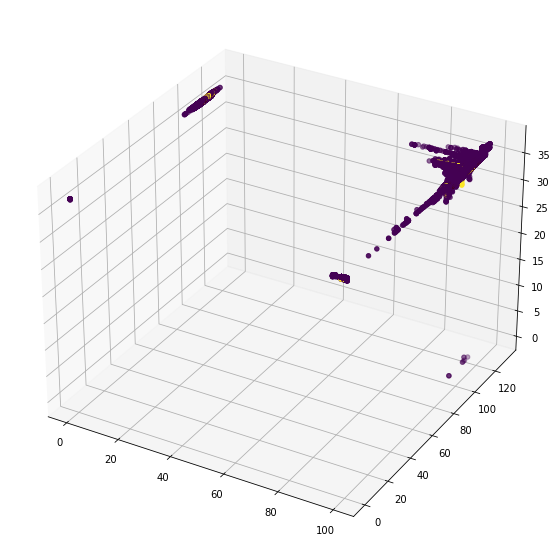

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')



x = df["SpO2"]
y = df["HR"]
z = df["Tblood"]

c = (df["A"] +1) //2

ax.scatter(x,y,z, c = c)



plt.show()